In [1]:
import matplotlib.pyplot as plt
from tabulate import tabulate
from vrplib import read_solution

from pyvrp import Model, read
from pyvrp.plotting import (
    plot_coordinates,
    plot_instance,
    plot_result,
    plot_route_schedule,
)
from pyvrp.stop import MaxIterations, MaxRuntime

# CVPR

In [2]:
INSTANCE = read("data/X-n439-k37.vrp", round_func="round")
BKS = read_solution("data/X-n439-k37.sol")

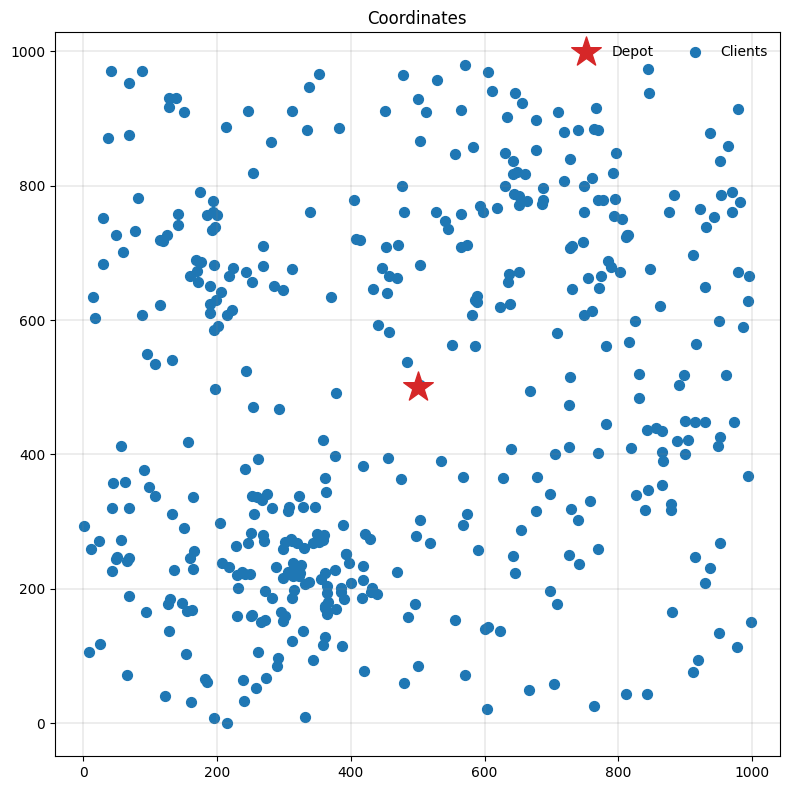

In [3]:
_, ax = plt.subplots(figsize=(8, 8))
plot_coordinates(INSTANCE, ax=ax)
plt.tight_layout()

In [ ]:
model = Model.from_data(INSTANCE)
result = model.solve(stop=MaxIterations(2000), seed=42, display=False)
print(result)

In [ ]:
gap = 100 * (result.cost() - BKS["cost"]) / BKS["cost"]
print(f"Found a solution with cost: {result.cost()}.")
print(f"This is {gap:.1f}% worse than the best known", end=" ")
print(f"solution, which is {BKS['cost']}.")

In [ ]:
fig = plt.figure(figsize=(15, 9))
plot_result(result, INSTANCE, fig)
fig.tight_layout()

# The VRP with time windows

In [ ]:
INSTANCE = read("data/RC208.vrp", round_func="dimacs")
BKS = read_solution("data/RC208.sol")

In [ ]:
fig = plt.figure(figsize=(12, 6))
plot_instance(INSTANCE, fig)

In [ ]:
model = Model.from_data(INSTANCE)
result = model.solve(stop=MaxIterations(1000), seed=42, display=False)
print(result)

In [ ]:
cost = result.cost() / 10
gap = 100 * (cost - BKS["cost"]) / BKS["cost"]
print(f"Found a solution with cost: {cost}.")
print(f"This is {gap:.1f}% worse than the optimal solution,", end=" ")
print(f"which is {BKS['cost']}.")

In [ ]:
fig = plt.figure(figsize=(15, 9))
plot_result(result, INSTANCE, fig)
fig.tight_layout()

In [ ]:
solution = result.best
routes = solution.routes()

data = [
    {
        "num_stops": len(route),
        "distance": route.distance(),
        "service_duration": route.service_duration(),
        "wait_duration": route.wait_duration(),
        "time_warp": route.time_warp(),
        "delivery": route.delivery(),
    }
    for route in routes
]

tabulate(data, headers="keys", tablefmt="html")

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(15, 9))
for idx, (ax, route) in enumerate(zip(axarr.flatten(), routes)):
    plot_route_schedule(
        INSTANCE,
        route,
        title=f"Route {idx}",
        ax=ax,
        legend=idx == 0,
    )

fig.tight_layout()

In [ ]:
solution = result.best
shortest_route = min(solution.routes(), key=len)

shortest_route.start_time()

In [ ]:
data = [
    {
        "start_service": visit.start_service,
        "end_service": visit.end_service,
        "service_duration": visit.service_duration,
        "wait_duration": visit.wait_duration,  # if vehicle arrives early
    }
    for visit in shortest_route.schedule()
]

tabulate(data, headers="keys", tablefmt="html")

In [ ]:
INSTANCE = read("data/RC2_10_5.vrp", round_func="dimacs")
BKS = read_solution("data/RC2_10_5.sol")